# CS5228 Assignment 3 - Tree-Based Models

Hello everyone, this assignment notebook covers Tree-Based Models. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:** 
* Rename and save this Jupyter notebook as **cs5228_a3_YourName_YourNUSNETID.ipynb** (e.g., **cs5228_a3_BobSmith_e12345678.ipynb**) before submission!
* Rename and save the script file *cs5228_a3_script.py* as **cs5228_a3_YourName_YourNUSNETID.py** (e.g., **cs5228_a3_BobSmith_e12345678.py**) before submission!
* Submission deadline is Oct 26, 11.59 pm. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use you full name if its a rather long; it's just  important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [1]:
student_id = 'A0285647M'
nusnet_id = 'e1216292'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1 Bagging and Feature Sampling (10 Points)**
    * 1.1 Implement Bootstrapping (2 Points)
    * 1.2 Implement Feature Sampling (2 Points)
    * 1.3 Comparing Bagging and Bagging+FeatureSampling (6 Points)
* **2 Implementing AdaBoost with Decision Stumps (30 Points)**
    * 2.1 Implementing a Decision Stump Classifier (12 Points)
        * 2.1 a) Calculating the Gini Score a Single Node (2 Points)
        * 2.1 b) Calculating the Gini Score for a Split (2 Points)
        * 2.1 c) Training the Decision Stump: Finding the Best Split (5 Points)
        * 2.1 d) Predicting the Classes (3 Points)
    * 2.2 Implementing AdaBoost (12 Points)
        * 2.2 a) Training the Gradient-Boosted Regressor (8 Points)
        * 2.2 b) Predicting Output Values (4 Points)
    * 2.3 Questions about AdaBoost (6 Points)
        * 2.3 a) Question 1 (2 Points)
        * 2.3 b) Question 2 (4 Points)
* **3 Evaluation of Tree-Based Models (10 Points)**
    * 3.1 Data Preprocessing (2 Points)
    * 3.2 Basic K-Fold Cross Validation (8 Points)
        * 3.2a) Comparing Tree-Based Regression Models (5 Points)
        * 3.2b) Assessing the Evaluation (3 Points)

## Setting up the Notebook

### Enable Auto-Reload

This ensures that any saved changes to your `.py` file gets automatically reloaded.

In [2]:
%load_ext autoreload
%autoreload 2

### Enable "Inline Plotting"

In [3]:
%matplotlib inline

### Importing Required Packages

In [4]:
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_validate

from src.utils import *

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `cs5228_a3.py`, you also need to edit the import statement below accordingly.

In [5]:
from cs5228_a3_ParasharaRamesh_e1216292 import *
#from cs5228_a3_BobSmith_e12345678 import get_noise_dbscan # <-- you will need to rename this accordingly

---

## 1 Bagging and Feature Sampling (10 Points)

In the lecture, we discussed the limitations of individual Decision Trees, which motivated the notion of Tree Ensembles. In a nutshell, a Tree Ensemble trains multiple Decision Trees within the same classifier and regressor to reduce variance and improve accuracy. The first approach towards creating Tree Ensembles was to train multiple Decision Trees over different samples of the data:

* **Bagging (Bootstrap Aggregation):** Sample a new dataset $D_i$ sampled from $D$ uniformly and with replacement ($|D_i| = |D|$)
* **Feature Sampling:** For a given dataset $D$ with $d$ features, consider only a random subset of features of size $m$ with $m<d$.

Combining Bagging and Feature Sampling is the underlying idea of *Random Forests*. In this task, you will explore the effects of Bagging and Bagging+FeatureSampling

We use the very basic [IRIS](https://archive.ics.uci.edu/ml/datasets/iris) dataset: it's small and clean, and has only numerical features. The dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

### Prepare Example Data

#### Load Data from File

In [6]:
df = pd.read_csv('data/a3-iris.csv')

# Convert the species name to numerical categories 0, 1, 2
df['species'] = pd.factorize(df['species'])[0]

# Show the first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Convert to NumPy Arrays

In [7]:
data = df.to_numpy()

X = data[:,0:4]
y = data[:,4].astype(int)

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (150, 4)
Shape of y: (150,)


### 1.1 Implement Bootstrapping (2 Points)

Implement method `create_boostrap_sample()` to generate a bootstrap sample for a given dataset! The input dataset is represented by feature array `X` and array `y` containing the class labels (classification) or output values (regression). Hint: numpy provides some convenient methods to make this a very simple task.

In [8]:
def create_bootstrap_sample(X, y):
    N, d = X.shape
    
    X_bootstrap, y_bootstrap = None, None
    
    #########################################################################################
    ### Your code starts here ###############################################################

    sampled_indices = np.random.choice(range(N), size=N, replace=True)
    num_unique_elements = len(np.unique(sampled_indices))
    # print(f"No of unique samples is {num_unique_elements}")
    X_bootstrap = X[sampled_indices]
    y_bootstrap = y[sampled_indices]

    ### Your code ends here #################################################################
    #########################################################################################
    
    return X_bootstrap, y_bootstrap


X_bootstrap, y_bootstrap = create_bootstrap_sample(X, y)

print('Shape of X_bootstrap: {}'.format(X_bootstrap.shape))
print('Shape of y_bootstrap: {}'.format(y_bootstrap.shape))

Shape of X_bootstrap: (150, 4)
Shape of y_bootstrap: (150,)


The shapes of `X_bootstrap` and `y_bootstrap` should of course be the same as the shapes of `X` and `y`, but containing randomly selected samples. If you need to convince yourself, you can also print some elements of `X` to see if they are different between runs.

### 1.2 Implement Feature Sampling (2 Points)

Implement the method `perform_feature_sampling()`! The input is feature array `X`; use the common approach introduced in the lecture for calculating the number of sampled features -- that is, the number of sample features $m = \lceil\sqrt{d}\rceil$. Apart from the new dataset `X_sample` the method also returns the *indices* of the selected features; we need those for the next task. Hint: Again, numpy should be your best friend here.

In [9]:
def perform_feature_sampling(X):
    N, d = X.shape
    
    X_feature_sampled, selected_indices = None, None
    
    #########################################################################################
    ### Your code starts here ###############################################################    
    m = np.ceil(np.sqrt(d)).astype(int)
    # print(f"m is {m}")

    selected_indices = np.random.choice(d, size=m, replace=False)

    X_feature_sampled = X[:, selected_indices]

    ### Your code ends here #################################################################
    #########################################################################################    
    
    return X_feature_sampled, selected_indices
    
X_sampled, selected_indices = perform_feature_sampling(X)

print('Shape of X_sampled: {}'.format(X_sampled.shape))
print('Selected indices: {}'.format(selected_indices))

Shape of X_sampled: (150, 2)
Selected indices: [3 1]


`X_sampled` has to contain the same number of data samples as `X`, but with less features than `X`. The number of selected indices should of course be reflected in the shape of `X`. For example, if the shape of `X` is $(n, m)$, then there should be $m$ selected indices.

### 1.3 Comparing Bagging and Bagging+FeatureSampling (6 Points)

Intuitively, different sampled dataset will yield different Decision Trees, not only regarding the accuracy, but also how the Decision Trees will "look like". In the following, we train a set of Decision Trees (using the Decision Tree implementation from `sklearn`) based on different dataset samples.

In the code cell below, we use our implementations of the auxiliary methods `create_boostrap_sample()` and `perform_feature_sampling()` to train a series of Decision Trees (i.e., a Tree Ensemble) using only Bagging as well as using Bagging + Feature Sampling. In the output, *root index* is the index of the feature used for the very first split, and *#nodes* reflects the total number of nodes in the tree.

In [10]:
# We need to set the seed as the sampling is random, and we want to ensure consistent results
np.random.seed(0)

print("Bagging only\t\t\t\t\tBagging + Feature Sampling")

for _ in range(20):
    # Create a new bootstrap sample (we can use the same for both ensembles)
    X_t, y_t = create_bootstrap_sample(X, y)
    classifier_bagging = DecisionTreeClassifier().fit(X_t, y_t)
        
    # Perform feature sampling on bootstrap sample
    X_t_fs, selected_indices = perform_feature_sampling(X_t)
    classifier_sampling = DecisionTreeClassifier().fit(X_t_fs, y_t)
    
    # Print core features of trained Decision Tree
    # (feature index of root node, total of number in Decision Trr)
    print(f"root index: {classifier_bagging.tree_.feature[0]},  #nodes: {classifier_bagging.tree_.node_count}\t\t"
          f"root index: {selected_indices[classifier_sampling.tree_.feature[0]]},  #nodes: {classifier_sampling.tree_.node_count}")

Bagging only					Bagging + Feature Sampling
root index: 3,  #nodes: 15		root index: 2,  #nodes: 15
root index: 2,  #nodes: 15		root index: 0,  #nodes: 57
root index: 2,  #nodes: 15		root index: 3,  #nodes: 29
root index: 2,  #nodes: 15		root index: 3,  #nodes: 25
root index: 2,  #nodes: 15		root index: 2,  #nodes: 21
root index: 3,  #nodes: 15		root index: 3,  #nodes: 27
root index: 2,  #nodes: 9		root index: 3,  #nodes: 17
root index: 3,  #nodes: 15		root index: 3,  #nodes: 21
root index: 3,  #nodes: 13		root index: 2,  #nodes: 21
root index: 3,  #nodes: 7		root index: 3,  #nodes: 17
root index: 2,  #nodes: 15		root index: 3,  #nodes: 19
root index: 3,  #nodes: 15		root index: 0,  #nodes: 61
root index: 2,  #nodes: 9		root index: 2,  #nodes: 15
root index: 2,  #nodes: 13		root index: 3,  #nodes: 19
root index: 2,  #nodes: 13		root index: 3,  #nodes: 15
root index: 3,  #nodes: 13		root index: 2,  #nodes: 17
root index: 2,  #nodes: 19		root index: 3,  #nodes: 17
root index: 2,  #nodes: 

**Interpret the result!** When comparing the resulting Decision Trees when using only **Bagging** and **Bagging+FeatureSampling** you must have observed several differences. List all your observations together with a brief explanation for the observed difference. What insights into the dataset can you gain from your observations?

**Your Answer:**

* In Bagging the root indices are typically only either 2 or 3, whereas in the Bagging + feature sampling case the indices vary between 0,2 & 3.
* The number of nodes in Bagging is most often around 15 , but takes values 7,9,11,13,19 occasionally. Whereas the number of nodes in the Bagging + feature sampling case shows a lot of variety & complexity (sometimes being as high as 61)
* What this means is that Bagging generally tends to construct decision trees with uniform tree structures and similar node counts. Whereas, Bagging along with feature sampling gives rise to more complex, diverse decision trees resulting in varying root indices and structures
* From the number of nodes present it is clear that bagging with feature sampling can handle more complex, high dimensional data with diverse feature importance due to the different root indices being chosen, whereas there is not much variation with just bagging


## 2 Implementing a AdaBoost with Decision Stumps (30 Points)

AdaBoost (Adaptive Boosting) is an ensemble learning method that combines the predictions of multiple base learners to improve overall classification performance. In AdaBoost, the base learners are typically weak learners, which are models that perform slightly better than random guessing (e.g., Decision Stumps). Here's a brief overview of how AdaBoost works using Decision Trees as base learners for classification tasks:

* **Initialization:** Assign equal weights to all training samples. These weights determine the importance of each sample in the training process.

* **Iterative Phase:**

    * *Base Learner Training:* Train a base learner (usually a Decision Stump) on the training data. It tries to minimize the weighted classification error, giving more weight to misclassified samples.

    * *Weighted Error Calculation:* Calculate the weighted classification error of the base learner. This error is the sum of the weights of misclassified samples.

    * *Classifier Weight Calculation:* Assign a weight to the base learner based on its performance. The better the performance, the higher the weight. This weight is used to determine the contribution of the base learner's prediction in the final ensemble.

    * *Update Sample Weights:* Increase the weights of misclassified samples so that they become more important in the next iteration. This focuses the subsequent base learners on the samples that are harder to classify correctly.

    * *Ensemble Building:* Combine the predictions of all base learners, weighted by their individual classifier weights, to obtain the final ensemble prediction.

* **Final Prediction:** The final prediction is made by aggregating the weighted predictions of all base learners.

AdaBoost's strength lies in its ability to focus on the difficult-to-classify examples, allowing it to improve performance even with weak base learners. This makes it particularly effective in situations where a single base learner might struggle. Keep in mind that while AdaBoost is powerful, it's important to be cautious about overfitting. AdaBoost can overfit if the base learners are too complex or if the number of iterations is too high. Therefore, it's advisable to monitor the performance on a validation set and potentially use techniques like early stopping or limiting the complexity of base learners.

Your last task will be to implement an AdaBoost Classifier using Decision Stumps as covered in the lecture. But not to worry, this may only sound more difficult than it actually is, and we will guide you through this process step by step. We also keep things simple by assuming that all input features are numerical values.

Fundamentally, we can split the implementation into 2 subtasks.

* **Weak Learner:** You first implement the simplest "Decision Stump Classifier", i.e., a Decision Tree with only one split and therefore a height of 1. This means we do not have to care about the recursive splitting of nodes; it's not complicated but would only add tedious coding.
* **AdaBoost:** With the Decision Stump Classifier in place, you can implement AdaBoost as shown in the lecture.

### Prepare Dataset

Again, we use the [IRIS](https://archive.ics.uci.edu/ml/datasets/iris) dataset here.

#### Load Dataset from File

In [11]:
np.random.seed(0)
df_iris = pd.read_csv('data/a3-iris.csv')
# Convert the 3 string class labels to 0, 1, and 2
df_iris.species = df_iris.species.factorize()[0]
df_iris = df_iris.sample(frac=1).reset_index(drop=True)
# Show sample of dataset
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,2.8,5.1,2.4,2
1,6.0,2.2,4.0,1.0,1
2,5.5,4.2,1.4,0.2,0
3,7.3,2.9,6.3,1.8,2
4,5.0,3.4,1.5,0.2,0


#### Convert Dataframe to NumPy arrays + Split into Training and Test Data

In [12]:
X = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy()
y = df_iris['species'].to_numpy().squeeze()

training_size = int(0.8 * X.shape[0])

X_train, y_train = X[:training_size], y[:training_size]
X_test, y_test = X[training_size:], y[training_size:]

print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


### 2.1 Implementing a Decision Stump Classifier (12 Points)

A Decision Stump is nothing else but a Decision Tree with typically only very few splits -- well, more generally, a Decision Tree with a (very) small height, but we keep it simple here. This means that we consider the smallest Decision Stump consisting of only a single split. This means that there is no need to continue recursively splitting child nodes like for a (full) Decision Tree trained to be a Strong Learner.

For finding the best split, we need two main things
* A scoring method to quantify how good a split is.
* A method to actually find the best split (using the scoring method).

You can find the skeleton code for the class `DecisionStumpClassifier` implementing the Decision Stump Classifier in the imported `py` file. You will need to complete this code step by step along with the subtask 2.1 a-d).

#### 2.1 a) Calculating the Gini Score of a Single Node (2 Points)

Recall from the lecture, that the Gini score of a node $t$ is defined as:

$$Gini(t) = 1 - \sum_{c\in C} P(c|t)^2$$

where $C$ is the set of classes, and $P(c|t)$ is the relative frequency of class $c$ in node $t$.

**Implement this formula in the method `calc_gini_score_node()`!** Hint: Have a look at [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) and basic `numpy` methods such as [`np.sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) and [`np.square`](https://numpy.org/doc/stable/reference/generated/numpy.square.html) to make your life easier. You can use the example calls below to test your implementation of the method. The comments indicate the expected results.

In [13]:
stump = DecisionStumpClassifier()

y1 = np.array([1, 1, 1, 1, 1, 1, 1, 1])
y2 = np.array([0, 0, 0, 0, 1, 1, 1, 1])
y3 = np.array([2, 0, 1, 1, 2, 2, 0, 2])

print(stump.calc_gini_score_node(y1)) # 0.0
print(stump.calc_gini_score_node(y2)) # 0.5
print(stump.calc_gini_score_node(y3)) # 0.625

0.0
0.5
0.625


#### 2.1 b) Calculating the Gini Score for a Split (2 Points)

In the lecture, we defined the impurity of a split as the average of the impurities of the child nodes, weighted by their size (in terms of the number of samples in each child node). Since we only consider binary splits (2 child nodes) and consider only the Gini score to measure impurity, the Gini score of a split simplifies to:

$$Gini(t_{left}, t_{right}) = \frac{n_{left}}{n}Gini(t_{left}) + \frac{n_{right}}{n}Gini(t_{right})$$

where $n_{left}$ ($n_{right}$) is the number of samples in the left (right) child node; and $n = n_{left} + n_{right}$

**Implement this formula in the method `calc_gini_score_split`!** You obviously can and should use the existing method `calc_gini_score_node()`. You can use the example calls below to test your implementation of the method. The comments indicate the expected results.

In [14]:
stump = DecisionStumpClassifier()

print(stump.calc_gini_score_split(y1, y1))  # 0.0
print(stump.calc_gini_score_split(y1, y2))  # 0.25
print(stump.calc_gini_score_split(y1, y3))  # 0.3125

0.0
0.25
0.3125


#### 2.1 c) Training the Decision Stump: Finding the Best Split (5 Points)

With the means to calculate the Gini score for an arbitrary split, we can now train our Decision Stump Classifier. Recall, that our Decision Tree will only have a height of 1 as we only need to make 1 split.

**Implement method `fit()`** to find the best split with respect to all features and corresponding thresholds. You obviously can and should use of the existing method `calc_gini_score_split()`. The skeleton code of method `fit()` already provides with the nested loop that goes through all features and the respective thresholds. Note that we keep it simple here as we use all unique values of a features as candidate thresholds.

You can use the example calls below to test your implementation of the method. The comments indicate the expected results.

In [15]:
stump = DecisionStumpClassifier().fit(X_train, y_train)

print("Index of best feature:", stump.feature_idx)
print("Best threshold:", stump.threshold)

Index of best feature: 2
Best threshold: 2.45


The output of previous cell should be:

```
Index of best feature: 2
Best threshold: 2.45
```

#### 2.1 d) Predicting the Class Labels (3 Points)

After training our Decision Stump Classifier, we now only need to implement the last step -- that is, the prediction of the class labels for new data samples. Again, since we only have 1 split, this step is also rather easy to implement.

**Implement method `predict()`** to predict the class labels for a given set of data samples. Hint: Have again a look at [`np.unique`](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) and and [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.square.html) to make your life easier. You can use the example calls below to test your implementation of the method. 

In [16]:
stump = DecisionStumpClassifier().fit(X_train, y_train)

print(stump.predict(X_test))

[0. 2. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 0.
 0. 0. 2. 2. 2. 0.]


The output of previous cell should be:

```
[0. 2. 0. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 0.
 0. 0. 2. 2. 2. 0.]
```

In [17]:
y_pred = stump.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')

print('The f1 score of your Decision Tree implementation on the toy dataset is {:.3f}'.format(f1))

The f1 score of your Decision Tree implementation on the toy dataset is 0.540


The resulting f1 score should be **0.540**.

**Testing your Implementation on the IRIS Dataset.** This part is only for you to test your implementation on a real-world dataset (IRIS) since the toy dataset might not reveal all bugs in your code. You can also directly compare the result your Decision Stump implementation with the results from scikit-learn's [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html); Of course, we need to set `max_depth=1` to make it a fair comparison.

In [18]:
my_stump = DecisionStumpClassifier().fit(X_train, y_train)
sk_stump = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)

my_y_pred = my_stump.predict(X_test)
sk_y_pred = sk_stump.predict(X_test)

my_f1 = f1_score(y_test, my_y_pred, average='macro')
sk_f1 = f1_score(y_test, sk_y_pred, average='macro')

print('The f1 score of your Decision Tree implementation on the IRIS dataset is {:.3f}'.format(my_f1))
print('The f1 score of sklearn Decision Tree implementation on the IRIS dataset is {:.3f}'.format(sk_f1))

The f1 score of your Decision Tree implementation on the IRIS dataset is 0.540
The f1 score of sklearn Decision Tree implementation on the IRIS dataset is 0.540


You should see an f1 score of **0.540** using both your implementation as well as the one from scikit-learn.

## 2.2 Implementing AdaBoost (12 Points)

AdaBoost is a very popular ensemble technique that trains a series of *Weak Learners* to make predictions. Although AdaBoost is a generic technique, it is very commonly used with Decision Stumps as Weak Learners, since Decision Trees with a limited maximum height make naturally good Weak Learners.

Again, we provide you with a skeleton code for the class implementing the AdaBoost Classifier. We call it `AdaBoostTreeClassifier` to avoid naming conflicts with `AdaBoostClassifier` of scikit-learn, and because we limit ourselves to Decision Trees (well, Stumps) as the estimators (i.e., the Weak Learners).

#### 2.1 a) Training the AdaBoost Classifier (8 Points)

In the lecture, we went step by step through the training process of an AdaBoost classifier. We saw that this process comprises multiple but rather straightforward steps.


**Implement method `fit()`** to train your `AdaBoostTreeClassifier`. The skeleton code of method `fit()` allows you to focus on the core steps within each iteration for training the next Weak Learner (here, our Decision Stump). To help you a little bit, we list the main 4 steps and give you the first step -- training the next estimator using the current dataset sample -- for free.

**Important:** By default, `AdaBoostTreeClassifier` uses your implementation of `DecisionStumpClassifier` as its Weak Learner. In case you had problems implementing `DecisionStumpClassifier` or you simply want to test the results, you can also use scikit-learn's `DecisionTreeClassifier`. To make this change, just use the commented line under Step 1 to train the Weak Learner.

You can use the example calls below to test your implementation of the method.

In [19]:
# We need to set the seed as the sampling is random
np.random.seed(0)

adaboost = AdaBoostTreeClassifier(n_estimators=5).fit(X_train, y_train)

# adaboost_from_skl = AdaBoostClassifier(n_estimators=5).fit(X_train,y_train)

print("The alpha values -- i.e., the amount-of-says -- are:")
print(adaboost.alphas)

The alpha values -- i.e., the amount-of-says -- are:
[0.36544375 0.54110924 0.61476166 0.64369347 0.50502969]


The output of previous cell should be:

```
The alpha values -- i.e., the amount-of-says -- are:
[0.36544375 0.54110924 0.65028309 0.65364937 0.53673646]
```

#### 2.2 b) Predicting the Class Labels (5 Points)

As the last step, we now only need our AdaBoost classifier to predict the class labels for unseen data samples. Again, we saw in the lecture how this works: For each data sample, we check which of the `n_estimators` estimators predicts a certain class label, and the sum of all the alphas (i.e., the amounts of say) of the estimators of the same class.

The skeleton code of the `AdaBoostTreeClassifier` already provides a method `predict()` which takes a list of data samples as input and calls the method `predict_sample()` to predict the class label for each data sample individually. It's not that difficult to do this completely vectorized without the loop over the data samples, but here we want to focus on the basic algorithm and not worry about performance.

**Implement method predict_sample()** to predict the class label for a given data sample. Hint: Have again a look at [np.argwhere](https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html) to maybe make your life easier. You can use the example calls below to test your implementation of the method.

In [20]:
# We need to set the seed as the sampling is random
np.random.seed(0)

adaboost = AdaBoostTreeClassifier(n_estimators=5).fit(X_train, y_train)

print(adaboost.predict(X_test))


[0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0]


The output of previous cell should be:

```
[0 2 0 0 2 0 2 1 1 1 2 2 1 2 0 1 2 2 0 1 1 2 1 0 0 0 2 1 2 0]
```

**Testing your Implementation on the IRIS Dataset.** We the code cell below, you can again directly compare the result your AdaBoost implementation with the scikit-learn [`AdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). Two things to note:

* By default, `AdaBoostClassifier` uses the `DecisionTreeClassifier` class as the estimators (i.e., the Weak Learners) with `max_depth=1`

* By default, `AdaBoostClassifier` sets `n_estimators=50`; we therefore choose the same default value for `AdaBoostTreeClassifier`

As a result, we do not have to set any parameters for `AdaBoostClassifier` and can use the default ones to allow for a fair comparison with your implementation of `AdaBoostTreeClassifier`.

In [21]:
my_adaboost = AdaBoostTreeClassifier().fit(X_train, y_train)
sk_adaboost = AdaBoostClassifier().fit(X_train, y_train)

my_y_pred = my_adaboost.predict(X_test)
sk_y_pred = sk_adaboost.predict(X_test)

my_f1 = f1_score(y_test, my_y_pred, average='macro')
sk_f1 = f1_score(y_test, sk_y_pred, average='macro')

print('The f1 score of your AdaBoost implementation on the IRIS dataset is {:.3f}'.format(my_f1))
print('The f1 score of the sklearn AdaBoost implementation on the IRIS dataset is {:.3f}'.format(sk_f1))

The f1 score of your AdaBoost implementation on the IRIS dataset is 0.933
The f1 score of the sklearn AdaBoost implementation on the IRIS dataset is 0.933


You should see an f1 score of **0.933** using both your implementation as well as the one from scikit-learn.

### 2.3 Questions about AdaBoost (6 Points)

Assume you use your implementation of `AdaBoostTreeClassifier` to train a binary classifier of the dataset shown in 1.1 b).

![](./data/2.3a.png)

**2.3 a) Question (2 Points):** Will the binary classifier be able to achieve a training error (not test error!) of 0? Explain your answer! (Your explanation is more important than a simple Yes/No answer)


**Your Answer:**

In the case of a regular decision tree we have seen that we need at-most only 8 splits to perfectly separate out each point ( i.e. training error of 0). In the case of my implementation AdaBoostTreeClassification, it has around 50 decision stump estimators each of which has a maximum depth of 1.

Since my Adaboost internally uses my DecisionStump implementation which tries to find out all possible thresholds across all features (which are just the x & y coordinate points in this case), it is fair to say that each decision stump given some data it might either choose to split this dataset either using a single "horizontal line separator" or single "vertical line seperator".

Adaboost basically tries to re-classify misclassified entries of the previous estimator by ensuring that those datapoints are picked again (with replacement) in a probabilistic manner. This approach for this particular dataset has a high chance of giving a training error of 0 because we will keep trying to correctly classify all points once the previous estimator(s) chooses a particular split.

Since each decision stump by itself cannot overfit the training data to give a training error of 0, the hope is that an ensemble of them together can correctly classify each point correctly

For this particular dataset, here is how a sample adaboost fitting might work.

Estimator 1: gives a vertical split between column 5 & 6 , classifying all points to the left as "blue" due to majority points being blue, and assigning all points to the right as "red" ( even though there are equal red and blue points)
Estimator 2: It samples majority of the datapoints which were misclassified and comes up with another single split to try and reduce that error ( say a horizontal line in between row 3&4). Now the misclassified points from this are weighed again

.
.
.
Estimator 50: Yet another single horizontal or vertical line is predicted based on the sampled datapoints using the weight of the previous estimator's misclassification weights.

Once we find all the splits, each of the 50 estimators have their own "say" values which can influence the final classification prediction.

Since 50 is high enough number ( much greater than 7 or 8 for example which were the number of splits needed in a regular decision tree), it seems likely that the combination of all of these estimators should be able to correctly classify all points. Even in case 50 estimators does not do the trick, increasing the number estimators even further (say to 100) will definitely ensure that all points are correctly classified.

However, if are to consider the 50th estimator's error as the training loss of the model , then obviously this weak decision stump cannot correctly classify all the points. From this perspective it is not possible to get a training error of 0. However, if are to consider the entire model's clasification results then it will most likely have a 100% accuracy assuming that the number of estimators are high enough.


**2.3 b) True/False Questions (4 Points):** In the table below are 4 statement that are either *True* or *False*. Complete the table to specify whether a statement is *True* or *False*, and provide a brief explanation for your answer (Your explanation is more important than a simple True/False answer)

This is a markdown cell. Please fill in your answers for (1)~(4).

| No. | Statement                                                                                               	| True or False?   	 | Brief Explanation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|-----|------------------------------------------------------------------------------------------------------------|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1   | AdaBoost usually performs better than Random Forests when the dataset contains mislabeled data points | False              | Even though both are ensemble models, adaboost is mainly a boosting algorithm trying to correctly classify misclassified points therefore it is very sensitive to noise and outliers. Random forests however is not as sensitive to noise due to the higher reduction in variance achieved across its various decision stumps                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| 2   | The error rate $\epsilon_m$ of the Adaboost classifier always decreases from one iteration to the next. | False              | Even though Adaboost aims to "boost" the misclassified points, it may not always decrease the error rate from iteration to iteration. Since each estimator is a decision stump it might so be the case that the error rate increases slightly for this particular estimator even though we sample the datapoints from the weights of the previous estimator. Since this is also very sensitive to noise, it might stumble upon a particular outlier data point during one of the iterations with one of its estimators causing the error value to increase. Therefore, we cannot guarantee that the error rate always decreases.                                                                                                                                                                                                                  |
| 3   | Assume an error rate of $\epsilon_m \leq 0.2$ in iteration $m$. This means that up to 20% of the data samples have been misclassified | False              | Assuming we have 100 datapoints, in the first iteration all weights will be 1. Since error is calculated as the $\Sigma_i^Nw_i.indicator_function(x_i)$ after 'm' iterations it might be the case that weights are a lot different where some points have more weight and other points have lesser weight. Therefore getting a value 0.2 with these new weights does not imply that upto 20% of the samples have been misclassified. If a point is repeatedly being misclassified it might have a high weight which contributes more to the error value of 0.2 so if he have such 'high' error datapoints we can get a value of 0.2 with a lot less number of misclassfied samples. A similar argument can be made on the other end of the spectrum as well as a lot of datapoints together could also contribute to the value of 0.2 in totality |
| 4   | If after running AdaBoost the last Weak Learner does not misclassify and training samples, additional iterations could still help reduce errors on unseen data  | False              | If the last 'weak' learning is able to perfectly classify all of the training samples it indicates that the model has 'overfit' on the training data. This does not mean that the model will perform better on unseen data and is not indicative of its generalizability. It could also be the case that the model has learnt to predict even outliers correctly as the adaboost algorithm is sensitive to noise. This would mean that testing on unseen data actually leads to a worse performance.                                                                                                                                                                                                                                                                                                                                              |

## 3 Evaluating Tree-Based Models

In this last part, we look into evaluation different tree-based models using k-fold cross validationa. K-fold cross-validation is a technique used in machine learning to assess the performance and generalization ability of a model. It involves dividing the dataset into K subsets (or "folds") of equal size. The model is trained on K-1 of these folds and tested on the remaining one. This process is repeated K times, with each fold used as the test set exactly once. The final performance metric is computed by averaging the results from each iteration. K-fold cross-validation helps ensure that the model's performance is consistent across different subsets of the data, reducing the risk of overfitting or underfitting.

### Prepare Dataset

#### Load Dataset from File

We use a [WHO Life Expectancy](https://www.kaggle.com/kumarajarshi/life-expectancy-who) dataset for this task. Note that we cleaned the dataset for you (i.e., there are no dirty records in there).

In [22]:
df = pd.read_csv('data/a3-life-expectancy-cleaned.csv')

df.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


#### Separate Features & Target

For your convenience, we split the dataframe into two, one containing the input features, the other containing the class labels.

In [23]:
df_X = df.iloc[:,0:-1]
df_y = df.iloc[:,-1]

num_samples, num_features = df_X.shape

print('The dataset contains {} samples with {} features'.format(num_samples, num_features))

The dataset contains 1649 samples with 20 features


In [24]:
df_y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [25]:
# from ydata_profiling import ProfileReport
# #using pandas profiling to check this particular dataframe
# train_profile = ProfileReport(df)
# train_profile.to_file(f"who_report.html")


### 3.1 Data Preprocessing (2 Points)

As usual, the first step is data preprocessing (informed by an EDA). As mentioned above, there's not much to do as this dataset does not contain any "dirty" records, particularly, there are no NA values in any of the columns/features. As such, there should be no need to remove any samples.

**Perform and data preprocessing/transformation steps you deem appropriate!** As it might affect your decision, the data will be used to train different tree-based models (recall: the tree-based classifiers of sklearn do not support categorical features!). Note that some preprocessing steps might be easier to perform on the pandas dataframe while others on the NumPy arrays. This is why we provide 2 code cells, but it's up to which one to use.

**Note:** Perform only preprocessing steps that are indeed needed, and briefly(!) explain your decision by commenting your code.

#### Encoding the only Categorical column & Why Normalization is not needed

In [26]:
#########################################################################################
### Your code starts here ###############################################################

'''
NOTE: Normalization is typically not needed in any tree based regression methods, as each tree based model makes decision splits using feature thresholds which are found using information theory metrics like gini score / entropy.

Even if we do normalization/scaling we will get no improvement in performance because only the units of the feature threshold split will change in accordance with the new scaling. e.g. if one of the decision splits earlier was "weight > 5000g" even if we change the scale to kgs we will end up with the same, equivalent split which is "weight > 5kg" instead.

'''

#1. Status column in X is categorical and has 2 classes 'Developing' & 'Developed'. Categorically encode this
df_X = pd.get_dummies(df_X, columns=['Status'])

### Your code ends here #################################################################
#########################################################################################

<b>Note:</b> I referred to <a href="https://www.kaggle.com/code/mayankbali2027202/life-expectancy-who-detailed-eda-and-exploration/notebook">this kaggle notebook</a> which does detailed EDA for this dataset. I would have preferred to perform imputation by "country" but since that is absent I will do it by "year" instead



#### Making some values null which don't make sense.

1. An adult mortality rate of 1 is likely a measurement error. As this means that only 1/1000 people die per year. Therefore it makes sense to designate these values as null if it falls below a certain threshold.
2. It is improbable for the infant mortality rate to be as low as 0 per 1000, therefore it makes sense to assign these as null and impute them later on.
3. Since BMI of 15 or below is considered severely underweight, and a BMI of 40 or higher is deemed morbidly obese. Therefore we can make any values outside this range as null and impute them later on.
4. Values of zero in the Under Five Deaths category are unlikely if not impossible.


In [27]:
#Checking nulls if there any
def nulls_breakdown(df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

nulls_breakdown(df_X)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


In [28]:
# nullifying adult mortality rate, anything which is below 5 percentile level you make it na.
mort_5_percentile = np.percentile(df_X["Adult Mortality"].dropna(), 5)
df_X["Adult Mortality"] = df_X.apply(lambda x: np.nan if x["Adult Mortality"] < mort_5_percentile else x["Adult Mortality"], axis=1)

# nullifying infant mortality rate,
df_X["infant deaths"] = df_X["infant deaths"].replace(0, np.nan)

#nullifying, improbable BMI values
df_X["BMI"] = df_X.apply(lambda x: np.nan if (x["BMI"] < 10 or x["BMI"] > 50) else x["BMI"], axis=1)

#nullifying unlikely under-five deaths
df_X['under-five deaths'] = df_X['under-five deaths'].replace(0, np.nan)


In [29]:
nulls_breakdown(df_X)

[iloc = 1] Adult Mortality has 82 null values: 4.97% null
[iloc = 2] infant deaths has 395 null values: 23.95% null
[iloc = 7] BMI has 780 null values: 47.3% null
[iloc = 8] under-five deaths has 353 null values: 21.41% null
Out of 21 total columns, 4 contain null values; 19.05% columns contain null values.


#### Imputing those null values by year

In the original dataset there is also a "nation" column. So ideally we could have imputed using nation value but since that is missing we can try to do imputation by year.The mean of each year is computed as follows.

In [30]:
imputed_data = []
for year in list(df_X["Year"].unique()):
    year_data = df_X[df_X["Year"] == year].copy()
    for col in list(year_data.columns):
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
df_X = pd.concat(imputed_data).copy()

In [31]:
nulls_breakdown(df_X)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


#### Converting to Numpy

In [32]:
 # Convert dataframes to numpy arrays
X, y = df_X.to_numpy(), df_y.to_numpy()

### 3.2 Basic K-Fold Cross Validation

The code cell below performs K-Fold Cross Validation. Note that we use `X` and `y` here, and assume our true test data for the final evaluation of the model(s) is a separate dataset. Since we only perform validation here, we can ignore the test data.

The code cell below allows you to train a `DecisionTreeRegressor`, a `RandomForestRegressor`, or a `GradientBoostingRegressor` (all `sklearn` implementations). You only need to remove the comment before the regressor of choice, and comment the 2 other regressors.

##### I. Decision Tree Regressor

In [33]:
%%time

# Only considered hyperparameter: max depth of trees
param_choices = [1, 2, 3, 5, 8, 10, 12, 15, 20, 25, 50]

# Keep track of results for visualization
param_to_scores = {}

for param in param_choices:

    # Train regressor with the current parameter setting
    regressor = DecisionTreeRegressor(max_depth=param)

    # Perform 10-fold cross_validations
    scores = cross_validate(regressor, X, y, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)
    
    # Extract the 10 RSME scores (training scores and validation scores) for each run/fold
    # The (-1) is only needed since we get the negative root mean squared errors (it's a sklearn thing)
    rsme_train = scores['train_score'] * (-1)
    rsme_valid = scores['test_score'] * (-1)
    
    ## Keep track of all num_folds f1 scores for current param (for plotting)
    param_to_scores[param] = (rsme_train, rsme_valid)
    
    ## Print statement for some immediate feedback (values in parenthesis represent the Standard Deviation)
    print('param = {}, RSME training = {:.1f} ({:.1f}), RSME validation = {:.1f} ({:.1f})'
          .format(param, np.mean(rsme_train), np.std(rsme_train), np.mean(rsme_valid), np.std(rsme_valid)))

param = 1, RSME training = 8.7 (0.1), RSME validation = 8.8 (1.3)
param = 2, RSME training = 8.6 (0.1), RSME validation = 8.8 (1.3)
param = 3, RSME training = 8.4 (0.2), RSME validation = 9.0 (1.4)
param = 5, RSME training = 7.9 (0.2), RSME validation = 9.3 (1.3)
param = 8, RSME training = 7.0 (0.3), RSME validation = 10.2 (1.3)
param = 10, RSME training = 6.3 (0.3), RSME validation = 10.8 (1.4)
param = 12, RSME training = 5.5 (0.4), RSME validation = 11.1 (1.3)
param = 15, RSME training = 4.4 (0.6), RSME validation = 11.7 (1.3)
param = 20, RSME training = 2.2 (0.6), RSME validation = 12.3 (1.0)
param = 25, RSME training = 0.7 (0.5), RSME validation = 12.6 (1.0)
param = 50, RSME training = 0.0 (0.0), RSME validation = 12.7 (0.9)
CPU times: total: 1.41 s
Wall time: 4.65 s


**Visualization of Results.** We provide you with 2 methods to visualize the results:
* `plot_validation_results()` shows all `num_folds` scores for each parameter setting together with the means and standard deviations of the validation scores.
* `plot_scores()` shows the training and validation scores for each parameter setting.

Just run the code cell below to plot both figures.

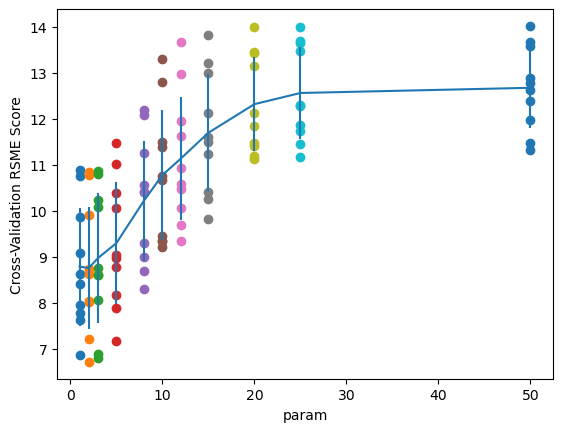

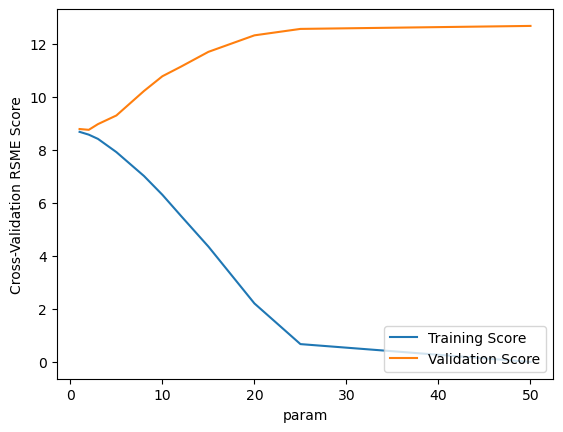

In [34]:
plot_validation_results(param_to_scores)

plot_scores(param_to_scores)

##### II. Random Forest Regressor

In [35]:
%%time

# Only considered hyperparameter: max depth of trees
param_choices = [1, 2, 3, 5, 8, 10, 12, 15, 20, 25, 50]

# Keep track of results for visualization
param_to_scores = {}

for param in param_choices:

    # Train regressor with the current parameter setting
    regressor = RandomForestRegressor(max_depth=param)

    # Perform 10-fold cross_validations
    scores = cross_validate(regressor, X, y, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)

    # Extract the 10 RSME scores (training scores and validation scores) for each run/fold
    # The (-1) is only needed since we get the negative root mean squared errors (it's a sklearn thing)
    rsme_train = scores['train_score'] * (-1)
    rsme_valid = scores['test_score'] * (-1)

    ## Keep track of all num_folds f1 scores for current param (for plotting)
    param_to_scores[param] = (rsme_train, rsme_valid)

    ## Print statement for some immediate feedback (values in parenthesis represent the Standard Deviation)
    print('param = {}, RSME training = {:.1f} ({:.1f}), RSME validation = {:.1f} ({:.1f})'
          .format(param, np.mean(rsme_train), np.std(rsme_train), np.mean(rsme_valid), np.std(rsme_valid)))

param = 1, RSME training = 8.7 (0.1), RSME validation = 8.8 (1.3)
param = 2, RSME training = 8.5 (0.1), RSME validation = 8.9 (1.3)
param = 3, RSME training = 8.3 (0.2), RSME validation = 8.9 (1.3)
param = 5, RSME training = 7.8 (0.2), RSME validation = 8.9 (1.3)
param = 8, RSME training = 6.7 (0.2), RSME validation = 9.1 (1.3)
param = 10, RSME training = 5.9 (0.2), RSME validation = 9.1 (1.2)
param = 12, RSME training = 5.0 (0.2), RSME validation = 9.1 (1.3)
param = 15, RSME training = 4.2 (0.2), RSME validation = 9.2 (1.2)
param = 20, RSME training = 3.5 (0.1), RSME validation = 9.2 (1.2)
param = 25, RSME training = 3.4 (0.1), RSME validation = 9.2 (1.2)
param = 50, RSME training = 3.3 (0.1), RSME validation = 9.2 (1.2)
CPU times: total: 3min 24s
Wall time: 7min


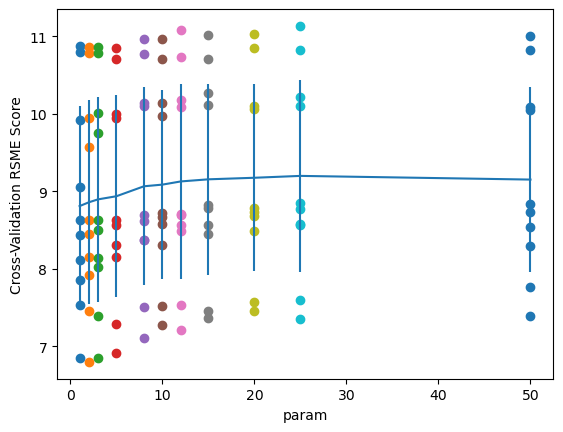

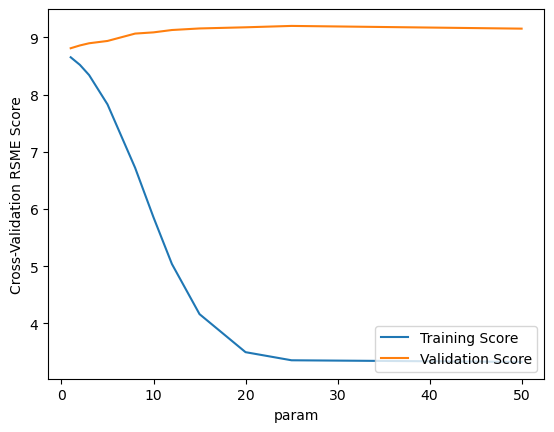

In [36]:
plot_validation_results(param_to_scores)

plot_scores(param_to_scores)

##### III. Gradient Boosted Regressor

In [37]:
%%time

# Only considered hyperparameter: max depth of trees
param_choices = [1, 2, 3, 5, 8, 10, 12, 15, 20, 25, 50]

# Keep track of results for visualization
param_to_scores = {}

for param in param_choices:

    # Train regressor with the current parameter setting
    regressor = GradientBoostingRegressor(max_depth=param)

    # Perform 10-fold cross_validations
    scores = cross_validate(regressor, X, y, cv=10, scoring='neg_root_mean_squared_error', return_train_score=True)

    # Extract the 10 RSME scores (training scores and validation scores) for each run/fold
    # The (-1) is only needed since we get the negative root mean squared errors (it's a sklearn thing)
    rsme_train = scores['train_score'] * (-1)
    rsme_valid = scores['test_score'] * (-1)

    ## Keep track of all num_folds f1 scores for current param (for plotting)
    param_to_scores[param] = (rsme_train, rsme_valid)

    ## Print statement for some immediate feedback (values in parenthesis represent the Standard Deviation)
    print('param = {}, RSME training = {:.1f} ({:.1f}), RSME validation = {:.1f} ({:.1f})'
          .format(param, np.mean(rsme_train), np.std(rsme_train), np.mean(rsme_valid), np.std(rsme_valid)))

param = 1, RSME training = 8.5 (0.1), RSME validation = 8.9 (1.3)
param = 2, RSME training = 7.9 (0.1), RSME validation = 9.0 (1.3)
param = 3, RSME training = 7.2 (0.1), RSME validation = 9.1 (1.3)
param = 5, RSME training = 5.1 (0.2), RSME validation = 9.3 (1.3)
param = 8, RSME training = 2.0 (0.1), RSME validation = 9.6 (1.2)
param = 10, RSME training = 0.8 (0.1), RSME validation = 9.9 (1.2)
param = 12, RSME training = 0.2 (0.0), RSME validation = 10.0 (1.1)
param = 15, RSME training = 0.0 (0.0), RSME validation = 10.6 (1.1)
param = 20, RSME training = 0.0 (0.0), RSME validation = 11.5 (1.3)
param = 25, RSME training = 0.0 (0.0), RSME validation = 11.7 (1.3)
param = 50, RSME training = 0.0 (0.0), RSME validation = 12.3 (0.9)
CPU times: total: 5min 27s
Wall time: 10min 28s


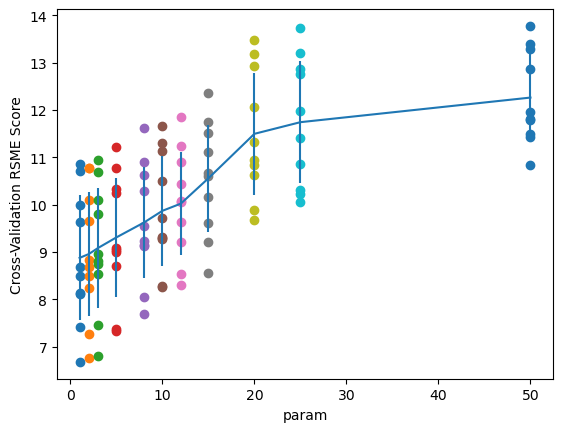

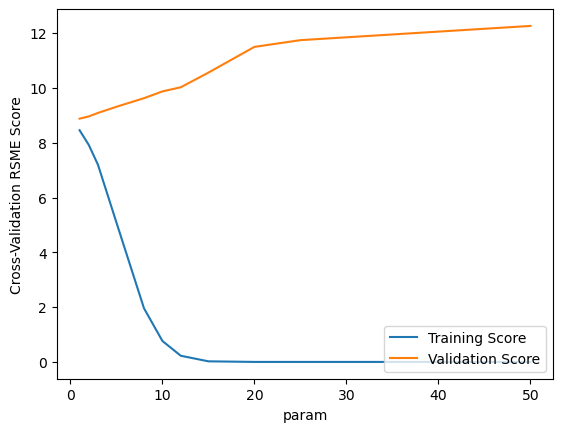

In [38]:
plot_validation_results(param_to_scores)

plot_scores(param_to_scores)

#### 3.2 a) Comparing Tree-Based Regression Models (5 Points)

Run the k-fold cross validation for all 3 regressors and compare and discuss the results! You should see quite a number of differences regarding runtimes, issues of overfitting and underfitting, overall performance, effects of parameter values, etc. You can use the code cells above for cross validation and visualization.

**Your Answer:**

#### 3.2 b) Assessing the Evaluation (3 Points)

Discuss if we found the best regressor with the cross-validation result from above! There is no need to implement anything here.

**Your Answer:**